# Dans ce notebook on lemmatize les textes 
### c'est une opération longue on enregistrera donc la base 
### on améliore les résultats mais on ne résout pas le problèmes des classes sur représentés 


In [118]:
#Ce notebook permet d'évaluer la difficultés du projet : Beaucoup de classe , et "asymétrie du train_set"

# 70.7% sans poncutation et en  lemmatisant les textes svm, 5 textes n'ont pas pu etre lemmatiser et donc laisser tel quel
# la base avec les textes lemmatisé est enregistrer car lemmatiser tous les textes + clean >2h 
# body_base_notcut_clean_lemmatiser.csv

# 68 % sans punctuation , 62 % avec ? , . etc. sans Lemmatizer 


In [1]:
#base body not cut, celle qu on utilise dans un premier temps 
import pandas as pd
df1 = pd.read_csv('body_base_notcut_clean.csv',sep='\t',  encoding = "latin" )
df1

,Unnamed: 0,Text,Titre,country histoire,dewey,encodage,genre,idBook,inspiration,keywords,...,note,periode,periode histoire,permalien,refDoc,refNum,sources,structure,taille,type
0,0,n ACTE I n SCÈNE I Argélie Clytie ...,"ARGÉLIE, REINE DE THESSALIE. TRAGÉDIE.",Grèce,NaN,NaN,Tragédie,NaN,histoire grecque,NaN,...,NaN,1671-1680,IIème avant JC,http://gallica.bnf.fr/ark:/12148/bpt6k5812122r,NaN,NaN,NaN,Cinq actes,1500-1750,vers
1,0,n ACTE I n SCÈNE PREMIÈRE Coriolan A...,"CORIOLAN, TRAGÉDIE.",Italie,NaN,NaN,Tragédie,NaN,histoire romaine,NaN,...,NaN,1671-1680,IIème avant JC,NaN,NaN,NaN,NaN,Cinq actes,1500-1750,vers
2,0,n ACTE I n SCÈNE I Érigone Iphis ...,"LYNCÉE, TRAGÉDIE.",Grèce,NaN,NaN,Tragédie,NaN,mythe grec,NaN,...,NaN,1671-1680,IIème avant JC,NaN,NaN,NaN,NaN,Cinq actes,1250-1500,vers
3,0,n n SCÈNE PREMIÈRE Argante Nérine n...,"L'AVARE AMOUREUX, COMÉDIE",France,NaN,NaN,Comédie,NaN,moeurs françaises,NaN,...,NaN,1781-1790,XVIIIème,http://gallica.bnf.fr/ark:/12148/bpt6k58182419,NaN,NaN,NaN,Un acte,(mesure non pertinente),prose
4,0,n PAN ET DORIS n SCÈNE PREMIÈRE n...,"PAN ET DORIS, PASTORALE",France,NaN,NaN,Pastorale,NaN,mythe grec,NaN,...,NaN,1721-1730,XVIIIème,NaN,NaN,NaN,NaN,Un acte,(mesure non pertinente),vers
5,0,n POLIXÈNE TRAGÉDIE EN UN ACTE n SCÈ...,"POLIXÈNE, TRAGÉDIE",Turquie,NaN,NaN,Comédie,NaN,mythe grec,NaN,...,NaN,1721-1730,Vème avant JC,NaN,NaN,NaN,NaN,Un acte,250-500,vers
6,0,n PROLOGUE DES TROIS SPECTACLES n SC...,"TROIS SPECTACLES, PROLOGUE",France,NaN,NaN,Prologue,NaN,moeurs françaises,NaN,...,NaN,1721-1730,XVIIIème,NaN,NaN,NaN,NaN,Un acte,(mesure non pertinente),prose
7,0,n n SCÈNE I Valère Frontin habillé en ...,"L'ÉPREUVE RÉCIPROQUE, COMÉDIE",France,NaN,NaN,Comédie,NaN,moeurs françaises,NaN,...,NaN,1711-1720,XVIIIème,http://gallica.bnf.fr/ark:/12148/bpt6k5455677h,NaN,NaN,NaN,Un acte,(mesure non pertinente),prose
8,0,n ACTE I n SCÈNE I Madame Abraham Be...,"L'ÉCOLE DES BOURGEOIS, COMÉDIE.",France,NaN,NaN,Comédie,NaN,moeurs françaises,NaN,...,NaN,1721-1730,XVIIIème,http://gallica.bnf.fr/ark:/12148/bpt6k56297021,NaN,NaN,NaN,Trois actes,(mesure non pertinente),prose
9,0,n L HIVER n SCÈNE PREMIÈRE n L HI...,"L'HIVER, COMÉDIE.",France,NaN,NaN,Comédie,NaN,mythe grec,NaN,...,NaN,1731-1740,(indéterminé),http://gallica.bnf.fr/ark:/12148/bpt6k5814947z,NaN,NaN,NaN,Un acte,750-1000,mixte


In [2]:
# on vire les colonne qui nous interresse pas et on transforme la colonne genre en label à predire 

df_utile = df1[['Text', 'Titre' ,'country histoire', 'periode', 'periode histoire','type', 'genre']]
del  df1
#df_utile = df_utile.sample(frac=1).reset_index(drop=True)
labels = list(df_utile.genre.unique())
df_utile['labels'] = df_utile['genre'].apply(labels.index)
df_utile

D:\Programmes\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Text,Titre,country histoire,periode,periode histoire,type,genre,labels
0,n ACTE I n SCÈNE I Argélie Clytie ...,"ARGÉLIE, REINE DE THESSALIE. TRAGÉDIE.",Grèce,1671-1680,IIème avant JC,vers,Tragédie,0
1,n ACTE I n SCÈNE PREMIÈRE Coriolan A...,"CORIOLAN, TRAGÉDIE.",Italie,1671-1680,IIème avant JC,vers,Tragédie,0
2,n ACTE I n SCÈNE I Érigone Iphis ...,"LYNCÉE, TRAGÉDIE.",Grèce,1671-1680,IIème avant JC,vers,Tragédie,0
3,n n SCÈNE PREMIÈRE Argante Nérine n...,"L'AVARE AMOUREUX, COMÉDIE",France,1781-1790,XVIIIème,prose,Comédie,1
4,n PAN ET DORIS n SCÈNE PREMIÈRE n...,"PAN ET DORIS, PASTORALE",France,1721-1730,XVIIIème,vers,Pastorale,2
5,n POLIXÈNE TRAGÉDIE EN UN ACTE n SCÈ...,"POLIXÈNE, TRAGÉDIE",Turquie,1721-1730,Vème avant JC,vers,Comédie,1
6,n PROLOGUE DES TROIS SPECTACLES n SC...,"TROIS SPECTACLES, PROLOGUE",France,1721-1730,XVIIIème,prose,Prologue,3
7,n n SCÈNE I Valère Frontin habillé en ...,"L'ÉPREUVE RÉCIPROQUE, COMÉDIE",France,1711-1720,XVIIIème,prose,Comédie,1
8,n ACTE I n SCÈNE I Madame Abraham Be...,"L'ÉCOLE DES BOURGEOIS, COMÉDIE.",France,1721-1730,XVIIIème,prose,Comédie,1
9,n L HIVER n SCÈNE PREMIÈRE n L HI...,"L'HIVER, COMÉDIE.",France,1731-1740,(indéterminé),mixte,Comédie,1


In [3]:
genre  = list(df_utile.genre)
genre

['Tragédie',
 'Tragédie',
 'Tragédie',
 'Comédie',
 'Pastorale',
 'Comédie',
 'Prologue',
 'Comédie',
 'Comédie',
 'Comédie',
 'Comédie',
 'drame liturgique',
 'Comédie',
 'Comédie',
 'Parodie',
 'Parodie',
 'Comédie',
 'Comédie',
 'Proverbe',
 'Farce',
 'Farce',
 'Comédie',
 'Comédie',
 'Farce',
 'Farce',
 'Comédie',
 'Comédie',
 'Intermède',
 'Comédie',
 'Proverbe',
 'Comédie',
 'Comédie',
 'Comédie',
 'Proverbe',
 'Proverbe',
 'Comédie',
 'Proverbe',
 'Monologue',
 'Comédie',
 'Comédie',
 'Comédie',
 'Comédie',
 'Pantomime',
 'Comédie',
 'Tragédie',
 'Tragédie',
 'Tragédie',
 'Tragédie',
 'Mascarade',
 'Comédie',
 'Comédie',
 'Comédie',
 'Comédie',
 'Tragi-comédie',
 'Tragi-comédie',
 'Tragi-comédie',
 'Tragi-comédie',
 'Tragi-comédie',
 'Tragédie',
 'Vaudeville',
 'Vaudeville',
 'Drame',
 'Comédie',
 'Comédie',
 'Comédie',
 'Drame',
 'Comédie',
 'Comédie',
 'Comédie',
 'Tragédie',
 'Tragédie',
 'Tragi-comédie',
 'Tragédie',
 'Tragi-comédie',
 'Tragédie',
 'Comédie',
 'Parodie',
 'T

# Réduction de dimension : Lemmatisation , on enleve les stops words, +nettoyage 

In [1]:
from stop_words import get_stop_words
stop_words = get_stop_words('french')
print(stop_words)

['a', 'ai', 'aie', 'aient', 'aies', 'ait', 'alors', 'as', 'au', 'aucun', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'aux', 'avaient', 'avais', 'avait', 'avant', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayez', 'ayons', 'bon', 'car', 'ce', 'ceci', 'cela', 'ces', 'cet', 'cette', 'ceux', 'chaque', 'ci', 'comme', 'comment', 'd', 'dans', 'de', 'dedans', 'dehors', 'depuis', 'des', 'deux', 'devoir', 'devrait', 'devrez', 'devriez', 'devrions', 'devrons', 'devront', 'dois', 'doit', 'donc', 'dos', 'droite', 'du', 'dès', 'début', 'dù', 'elle', 'elles', 'en', 'encore', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fais', 'faisez', 'fait', 'faites', 'fois', 'font', 'force', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'haut', 'ho

### On utilise StanfordPOSTagger pour le tagger le français et french_lefff_lemmatizer pour lemmatizer 

In [2]:
# telecharger le code source  là https://nlp.stanford.edu/software/tagger.shtml#About


from nltk.tag import StanfordPOSTagger
import os

jar = 'D:/Programation/python/stanford-postagger-full-2018-10-16/stanford-postagger-3.9.2.jar'
model = 'D:/Programation/python/stanford-postagger-full-2018-10-16/models/french.tagger'

java_path = "C:/Program Files/Java/jdk1.8.0_151/bin/java.exe"
os.environ['JAVAHOME'] = java_path

pos_tagger = StanfordPOSTagger(model, jar, encoding='utf8' )
res = pos_tagger.tag('je suis libre'.split())
print (res)

[('je', 'CLS'), ('suis', 'V'), ('libre', 'ADJ')]


In [6]:
# https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer
from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer
lemmatizer = FrenchLefffLemmatizer()
lemmatizer.lemmatize('voudrais', 'v')


'vouloir'

In [3]:
from nltk.tag import StanfordPOSTagger
import os
def pos_tag_french(string):
    jar = 'D:/Programation/python/stanford-postagger-full-2018-10-16/stanford-postagger-3.9.2.jar'
    model = 'D:/Programation/python/stanford-postagger-full-2018-10-16/models/french.tagger'
    java_path = "C:/Program Files/Java/jdk1.8.0_151/bin/java.exe"
    os.environ['JAVAHOME'] = java_path
    pos_tagger = StanfordPOSTagger(model, jar, encoding='utf8' )
    res = pos_tagger.tag(string.split())
    return res

#V pour verbe, NC  nom commun, ADV adverbe, ADJ adjectif
#ADJ, ADV, NC, V = 'a', 'r', 'n', 'v'

from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer
lemmatizer = FrenchLefffLemmatizer()
lemmatizer.lemmatize('voudrais', 'v')

def map_tag(tagged_string):
    new_tagged_string=[]
    for word, tag in tagged_string:
        if tag=='NC':
            t= 'n'
        elif tag == 'ADJ':
            t='a'
        elif tag =='ADV':
            t='r'
        elif tag =='V':
            t='v'
        else:
            t='vide'
        new_tagged_string.append((word,t))
    return new_tagged_string

def lemmatize_french(new_tagged_string):
    string =""
    lemmatizer = FrenchLefffLemmatizer()
    for word, tag in new_tagged_string:
        if tag =='vide':
            string= string+ " "+word
        else:
            string = string+ " "+ lemmatizer.lemmatize(word, tag)
    return string
    
lemmatize_french(map_tag(pos_tag_french("je veux manger des avions")))        



' je vouloir manger des avion'

### nettoyage + regex 

In [7]:
import nltk 
from nltk.tokenize.moses import MosesDetokenizer
import  unicodedata
import re

#unicodedata.normalize("NFKD", z)


#df_utile1 = df_utile
#series = pd.Series(list(df_utile1.Text), index= list(df_utile1['genre'].apply(labels.index)))

def clean_bis(x):
    detokenizer = MosesDetokenizer()
    
    
    list_x = nltk.word_tokenize(x)
    l_clean =[]
    for mot in list_x :
        if mot != 'n' and mot not in stop_words and mot!= 'c' and mot!='C':
            if "xa0" in mot:
                mot= mot.replace(u'xa0', u' ')
                
            l_clean.append(mot)
    return  detokenizer.detokenize(l_clean, return_str=True)

def clean(x):
    c=0
    detokenizer = MosesDetokenizer()
    list_x = nltk.word_tokenize(x)
    l_clean =[]
    for mot in list_x :
        if mot != 'n' and mot not in stop_words and len(mot)>1:
            if "xa0" in mot:
                mot= mot.replace(u'xa0', u' ')
                
            l_clean.append(mot)
    # remet sous forme de string 
    s = detokenizer.detokenize(l_clean, return_str=True)
    
    #  regex : on vire par un espace quand y a plus de 2 vigurles qui se suivent 
    # dans le cas où l'on veut intégrer la punctuation du texte
    s = re.sub(',{2,}', ' ', s)
    #s = re.sub('...{1,}', ' ', s)
    
    # pour catch une os error , si erreur pas lemmatiser
    try: 
        #pos_tag_french
        tagged_word= pos_tag_french(s)
        # pour utiliser le french lemmatizer
        new_tagged_word= map_tag(tagged_word)
        #lemmatize
        s = lemmatize_french(new_tagged_word)
    except  :
        print("erreur tag")
   
    return s 





def clean1(x):
    return x
    
# FONCTION MAP CLEAN SUR LA DF 
clean("les pecheurs volent dans le ciel ")
#df_clean = series.apply(clean)

' pecheurs voler ciel'

In [13]:
df_reserve = df_c

In [14]:
df_c['genre']= genre

In [9]:
# exemple premier texte 
df_c = df_clean.to_frame()
df_c.iloc[0,0]

' acte SCÈNE Argélie Clytie ARGÉLIE Gardes venir Phoenix Timagène Vous Clytie approcher Hé bien Que Ismène intérêt État rigueur Rien fléchir infidèle soeur Ne rendre CLYTIE douter plus Madame ardeur tant Rois échauffer point âme Et quoi prison ajoutiez affreux Vous obtenir jamais écoute voeu Mais excès puni captif oeil an bannie toujours respect malgré courroux Elle plaindre Sort plaindre Sa vertu jusqu point démentie ARGÉLIE Il encor temps temps venir Clytie Quand cher amant attacher Lieux Elle voir sang rejaillir oeil Que miens loisir jouissant peine Sur sang cher promener haine Quels cri Quels coup coeur abattu Que plainte attends vertu amour vengeance préparer CLYTIE Quoi coeur glacé amour enfin emparer Madame Ismène pu changer sentiment ARGÉLIE Elle aimer perfide amant Deux traître Ingrats Cour vue brûler beauté flamme imprévue Et jour mille hommage secret Du mépris outrageant bien faits Je dire rien Leur intrigue certain Je savoir Phoenix enfin Timagène CLYTIE Eux Thessalie oeil 

In [15]:
df_c.head()

,0,genre
0,acte SCÈNE Argélie Clytie ARGÉLIE Gardes veni...,Tragédie
0,acte SCÈNE PREMIÈRE Coriolan Albin CORIOLAN Q...,Tragédie
0,acte SCÈNE Érigone Iphis IPHIS non Madame mor...,Tragédie
1,SCÈNE PREMIÈRE Argante Nérine ARGANTE enfin N...,Comédie
2,PAN ET DORIS SCÈNE premier PAN figurer Valémo...,Pastorale


In [111]:
a = list(df_c.iloc[:,0])
#a[0]

In [43]:
# body en ENTIER ici

#on transforme la df en Xtrain, X_test, y_test, y_train ...

list_text = list(df_c.iloc[:,0])
list_label = list(df_utile1['genre'].apply(labels.index))



test_size = int(len(list_text)/5)
test_set , train_set  = list_text[:test_size], list_text[test_size:]
test_label, train_label = list_label[:test_size], list_label[test_size:]


In [44]:
#Vectorise

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_set )
X_train_counts.shape

(820, 62973)

In [45]:
 #TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(820, 62973)

In [ ]:
#XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.1) 73% de précision
from xgboost import XGBClassifier
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.1))])

text_clf = text_clf.fit(train_set, train_label)


predicted = text_clf.predict(test_set)
np.mean(predicted == test_label)

In [46]:
#Naive Bayes

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, train_label)
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

text_clf = text_clf.fit(train_set, train_label)

In [47]:
#Naive Bayes

import numpy as np

predicted = text_clf.predict(test_set)
np.mean(predicted == test_label)

0.6634146341463415

In [48]:
#SVM

from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=5, random_state=42))])

text_clf_svm = text_clf_svm.fit(train_set, train_label)
predicted_svm = text_clf_svm.predict(test_set)
np.mean(predicted_svm == test_label)

D:\Programmes\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.70243902439024386

In [49]:
# Similarly doing grid search for SVM
from sklearn.model_selection import GridSearchCV
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False),'clf-svm__alpha': (1e-2, 1e-3)}

gs_clf_svm = GridSearchCV(text_clf_svm, parameters_svm, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(train_set, train_label)


gs_clf_svm.best_score_
gs_clf_svm.best_params_

D:\Programmes\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
D:\Programmes\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


{'clf-svm__alpha': 0.001, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 1)}

In [50]:
predicted_svm_gs = gs_clf_svm.predict(test_set)
np.mean(predicted_svm_gs == test_label)

0.70731707317073167

## Résultats: plus précis mais toujours comédie et tragédie essentiellement prédites

In [52]:
predicted_svm_gs

array([ 4,  4,  2,  4,  4,  4,  4,  2,  4,  4,  4,  4,  2,  4,  4,  4,  4,
        4,  2,  2,  4,  4,  2,  4,  4,  4,  4,  2,  4,  2,  4,  2, 16, 16,
        4,  4,  4,  2,  4,  4,  2,  2,  2,  4,  4,  3,  4,  4,  2,  4,  4,
        4,  4,  4,  4,  4,  4,  2,  4,  4,  4,  4,  2,  4,  4, 13,  4,  2,
        2,  2,  2,  2,  4,  4,  4,  4,  4,  2,  2,  4,  2,  4,  4,  2,  4,
        4,  4,  2,  2,  4,  4,  4,  2,  2,  4,  4,  4,  2,  2,  2,  2,  4,
        4,  4,  4,  4,  4,  4,  4,  2,  2,  2,  2,  4,  2,  2,  2,  4,  2,
        4,  4,  2,  4,  4,  4,  4,  4,  4,  4,  4,  2,  4,  2,  4,  4,  4,
        4,  4,  4,  2,  4,  2,  2,  4,  2,  2,  2,  4,  3,  4,  2,  6,  4,
        4,  4, 16,  4,  4, 16,  2,  4,  2,  4,  4,  4,  4,  4,  4,  2,  2,
        4,  2,  4,  4,  4,  2,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  2,
        4,  4,  4,  4,  2,  2,  2,  4,  4,  4,  4,  2,  2,  4,  2,  2,  4,
        2], dtype=int64)

In [53]:
np.array(test_label)

array([ 0,  1,  2,  3,  4,  4,  1,  2,  4,  4,  5,  4,  2,  4,  4,  6,  4,
        4,  2,  7,  8,  4,  9,  4,  4,  4,  9,  9,  4,  2,  4,  9, 10, 11,
       12,  4,  4,  2,  4,  4,  2,  2,  2, 13,  4,  3,  4,  4,  2,  4, 13,
        4,  4,  4,  4,  2,  4,  2,  4,  3,  4,  0, 14,  4,  4, 13,  4,  2,
        9, 14,  2,  2,  4,  4, 15,  4,  4, 13,  2,  9,  9, 14,  4, 10, 16,
        4,  4, 17,  2,  4, 18,  4,  2,  2,  4,  4,  4, 17,  2,  9,  2,  4,
        4,  4,  4,  4, 14,  4,  4,  2,  2,  2,  2,  4,  2,  9,  2,  4,  2,
        4, 13,  2,  4,  3,  4,  4,  4,  8,  4, 19,  2,  3,  2,  4,  4,  4,
        4, 13,  4,  2,  4,  2,  2,  3,  7,  2,  2,  4,  3,  4,  2,  6,  4,
       20,  4, 16, 17,  4,  4,  2,  4,  2,  4,  4,  8,  4,  4,  4,  2,  9,
        4,  2,  4,  4, 13,  2,  4,  4,  4, 21,  4,  9,  4,  4,  3, 22,  2,
       13,  9,  4,  4,  2, 16,  2,  4,  4,  4, 17,  2,  2,  4,  2,  4,  8,
        2], dtype=int64)

In [59]:
df_utile.head()

,Text,Titre,country histoire,periode,periode histoire,type,genre,labels
0,n ACTE I n SCÈNE PREMIÈRE Lisimène B...,"AMARILLIS, PASTORALE.",France,1651-1660,(inconnue),vers,Pastorale,0
1,n PROLOGUE n n Le théâtre représe...,"LES FÂCHEUX, COMÉDIE",France,1661-1670,XVIIème,vers,Comédie-ballet,1
2,n ACTE I n SCÈNE I Roxelane Osman ...,"MUSTAPHA et ZÉANGIR, TRAGÉDIE",Turquie,1771-1780,XVIème,vers,Tragédie,2
3,n n PROVERBE n CATOS n Mo...,"VOYAGE DE CAMPAGNE, PROVERBE",France,1691-1700,XVIIIème,prose,Proverbe,3
4,n LA DÉSOLATION DES JOUEUSES n SCÈNE...,"LA DÉSOLATION DES JOUEUSES, COMÉDIE EN UN ACTE",France,1681-1690,XVIIème,prose,Comédie,4


In [65]:
set(y_test)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22}

In [68]:
label_name

['Pastorale',
 'Comédie-ballet',
 'Tragédie',
 'Proverbe',
 'Comédie',
 'mystère',
 'Farce',
 'Parodie',
 'opuscule dramatique',
 'Tragi-comédie',
 'Tragédie lyrique',
 'Pastorale héroïque',
 'Vaudeville',
 'Monologue',
 'Drame',
 'Parade',
 'Opéra',
 'Comédie héroïque',
 'Trait historique',
 'Opuscule dramatique',
 'Prologue',
 'Intermède',
 'Pièce',
 'Pièce dramatique',
 'Opéra comique',
 'Dialogue',
 'Divertissement',
 'dialogue',
 'Bergerie',
 'dialogue des morts',
 'pièce satirique',
 'Opéra Bouffe',
 'Comédie galante',
 'Fait historique',
 'Divertissement spirituel',
 'Tragédie en musique',
 'Pochade',
 'Piece',
 'Mélodrame',
 'Ballet',
 'Ambigu poissard',
 'anecdote',
 'Saynète',
 'Saynette',
 'Monologue lyrique',
 'Pantomime',
 'Mascarade',
 'A propos',
 'drame liturgique',
 'Poème dramatique',
 'Apologie']

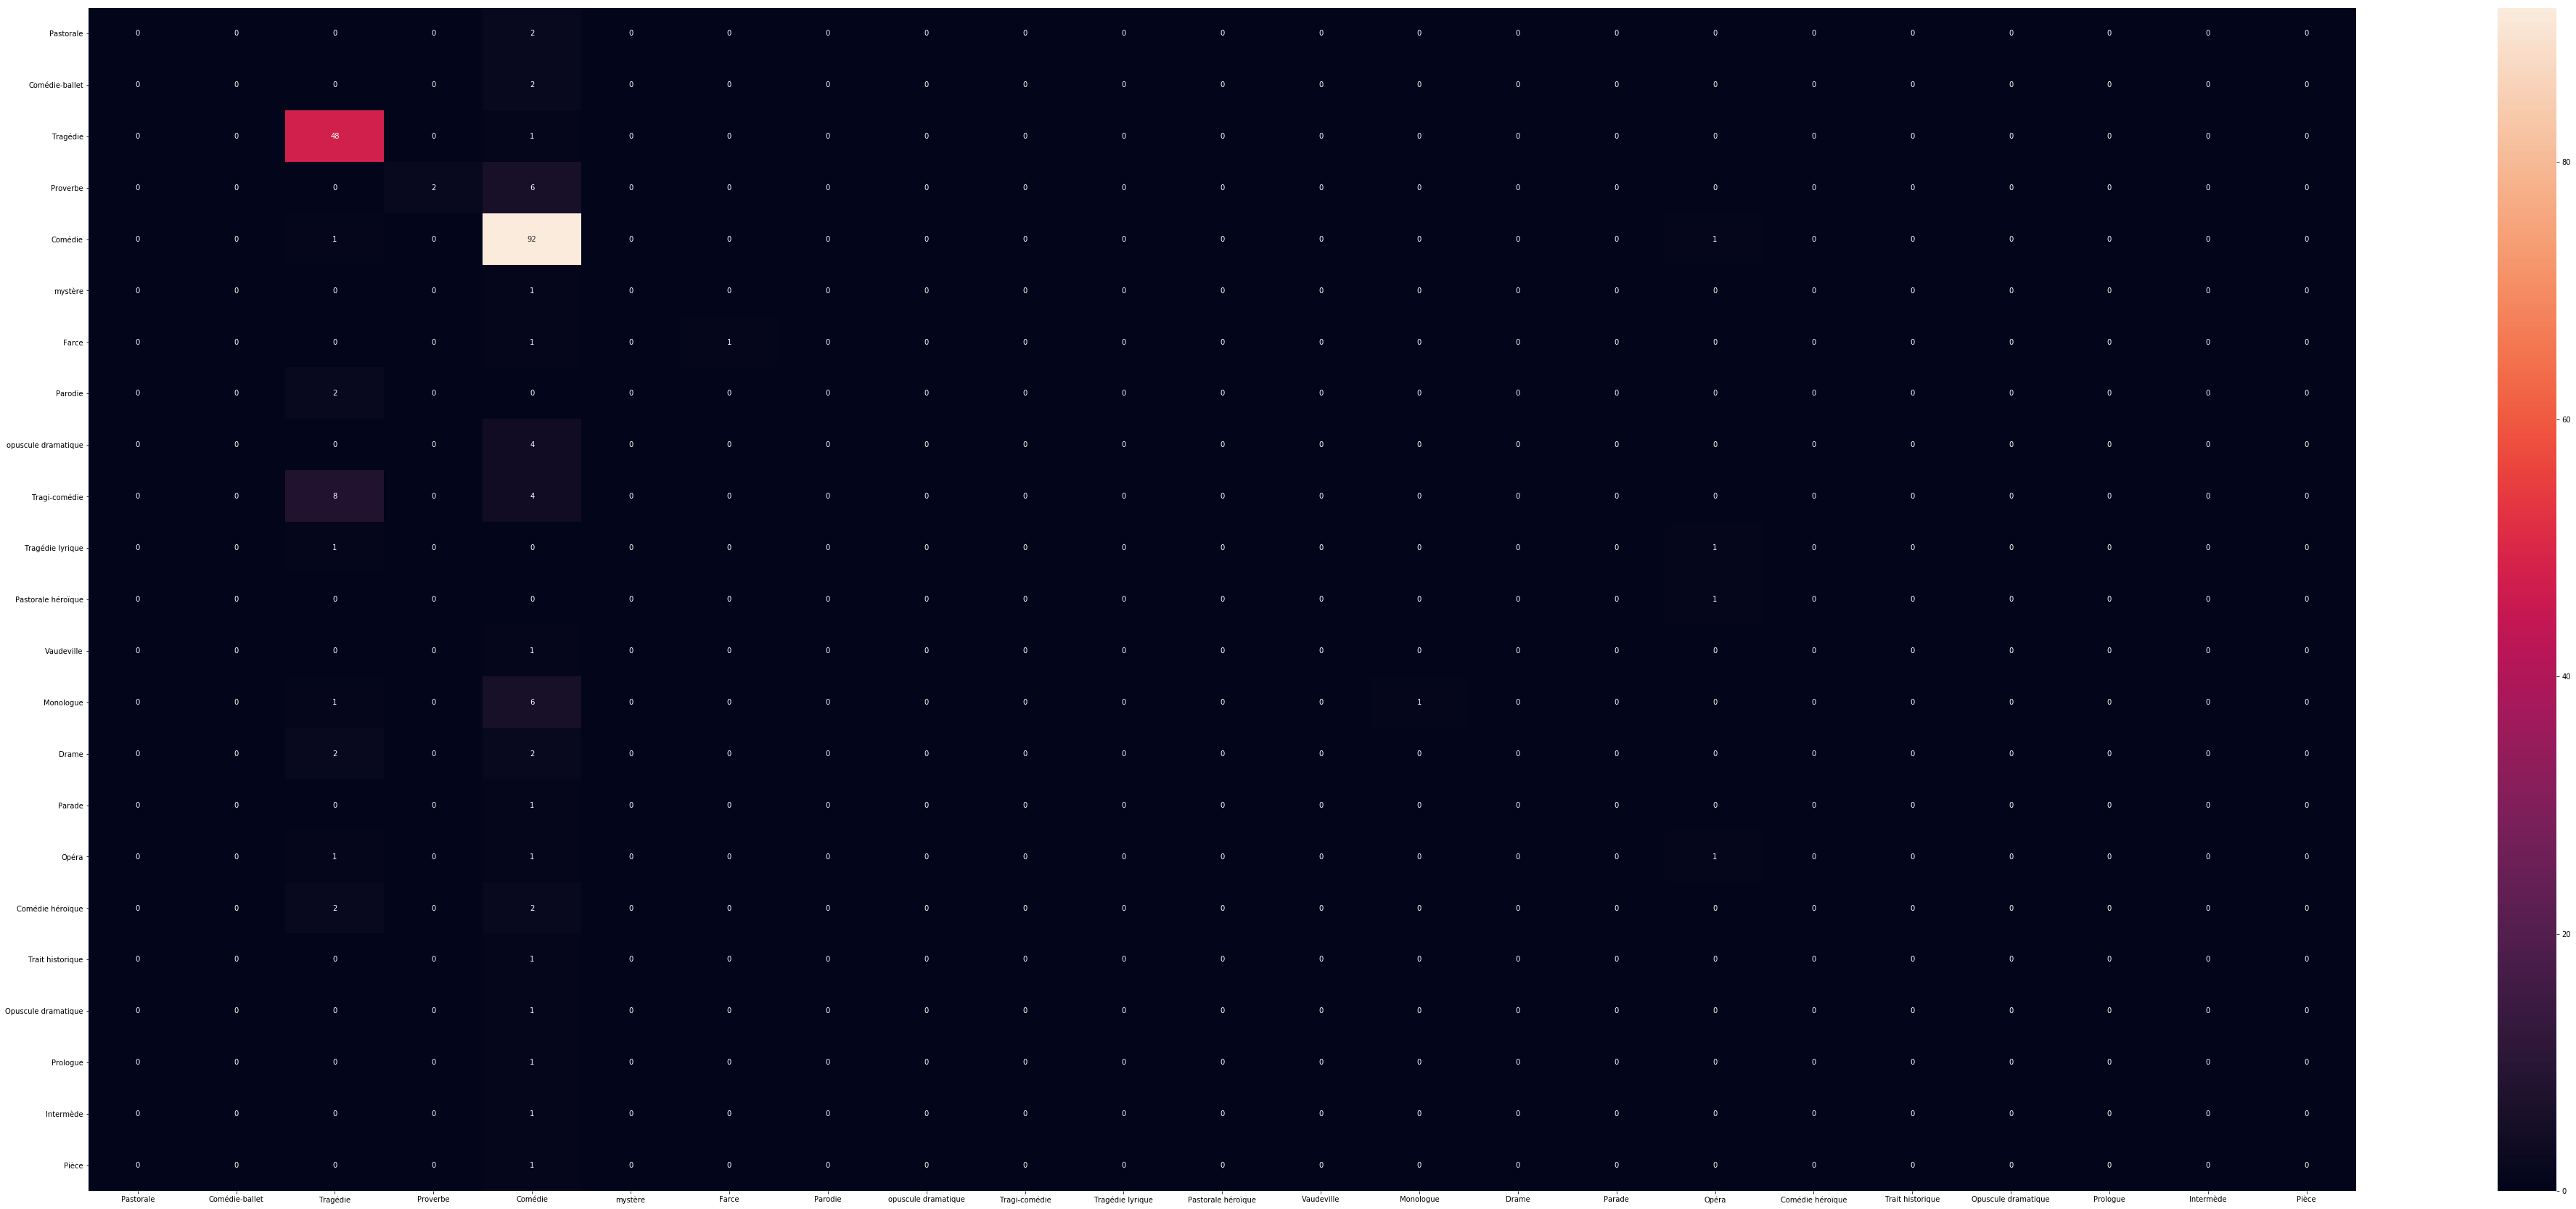

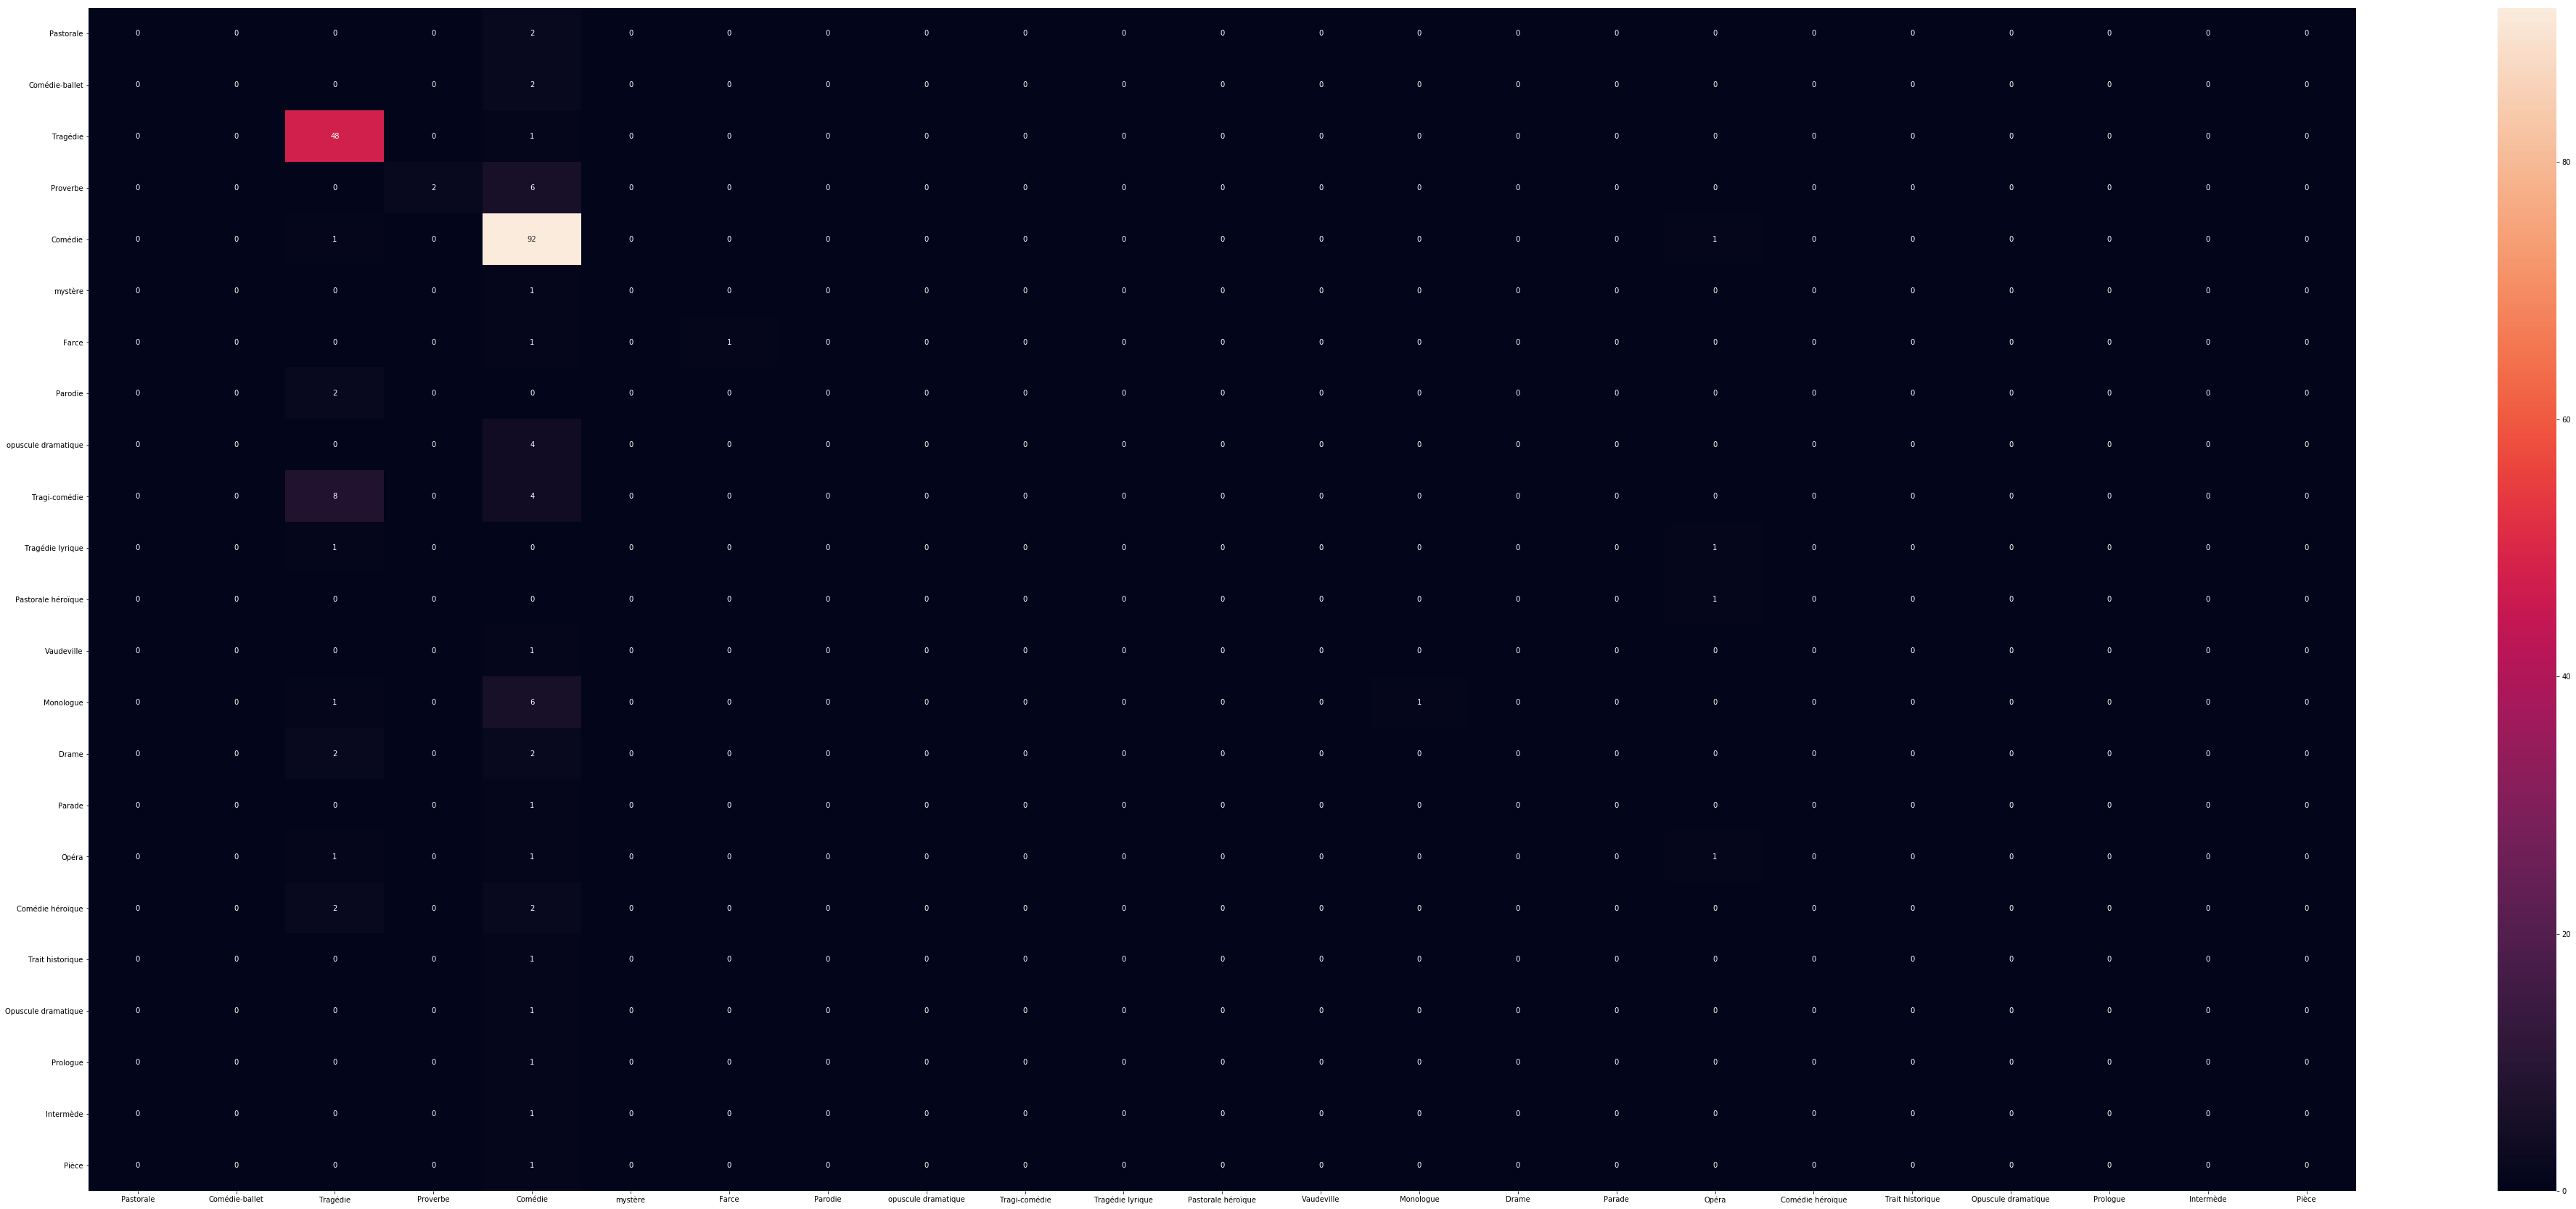

In [67]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred= predicted_svm_gs
y_test = test_label
array = confusion_matrix(y_test, y_pred)

#Image disponnible à la racine du projet parce que là on voit rien 
label_name =sorted(set(list(df_utile.genre)), key=list(df_utile.genre).index)


label_name =sorted(set(list(df_utile.genre)), key=list(df_utile.genre).index)


df_cm = pd.DataFrame(array, index = label_name[0:23] , columns = label_name[0:23])
plt.figure(figsize = (70,30))
sn.heatmap(df_cm, annot=True)
plt.show()